In [ ]:
import cv2
import os
  
# Read the video from specified path
cam = cv2.VideoCapture(r"C:\Users\Vaibhavi\Desktop\VID-20220311-WA0011.mp4")
dest = r"C:\Users\Vaibhavi\Desktop\hm\rohit"

currentframe = 1
  
while(True):
      
    # reading from frame
    ret,frame = cam.read()
  
    if ret:
        # if video is still left continue creating images
        name = str(currentframe) + '.jpg'
#         print ('Creating...' + name)
  
        # writing the extracted images
        cv2.imwrite(os.path.join(dest, name), frame)
  
        # increasing counter so that it will
        # show how many frames are created
        currentframe += 1
    else:
        break
  
# Release all space and windows once done
cam.release()
cv2.destroyAllWindows()

# cv2.imwrite(os.path.join(path , 'waka.jpg'), img)


In [ ]:
img = cv2.imread(r"C:\Users\Vaibhavi\Desktop\OCR\Kau\20220609_155559.jpg")
img.shape

In [ ]:
img1 = cv2.imread(r"C:\Users\Vaibhavi\Desktop\OCR\new_kau\kau46.jpg")
img1.shape

In [ ]:
k = glob.glob(r"C:\Users\Vaibhavi\Desktop\OCR\Vab" + "/*.jpg")

In [ ]:
len(k)

In [ ]:
dest = r"C:\Users\Vaibhavi\Desktop\OCR\new_kau"

In [11]:
!pip install wand

In [ ]:
with Image(filename =r"C:\Users\Vaibhavi\Desktop\vab1.jpg") as img:
    img.distort('affine', (45, ))
    img.save(filename ='gogdistort1.png')

In [ ]:
from wand.image import Image
 
# Import the image
with Image(filename =r"C:\Users\Vaibhavi\Desktop\vab1.jpg") as image:
    # Clone the image in order to process
    with image.clone() as shear:
        # Invoke shear function
        shear.shear('Grey', 15, 0)
        # Save the image
        shear.save(filename ='shea1.jpg')

In [49]:
li = glob.glob(r"C:\Users\Vaibhavi\Desktop\OCR\target-v" + "/*.jpg")
# li = os.listdir(r"C:\Users\Vaibhavi\Desktop\OCR\source-k")
len(li)

35

In [50]:
li

['C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\211.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\212.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\213.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\214.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\215.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\216.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\217.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\218.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\219.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\220.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\221.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\222.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\223.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\224.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\225.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\226.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\target-v\\227.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\

In [52]:
i=281
desti = r"C:\Users\Vaibhavi\Desktop\OCR\left"
for img in li:
    with Image(filename =img) as image:
    # Clone the image in order to process
        with image.clone() as shear:
        # Invoke shear function
            shear.shear('Grey', -15, 0)
        # Save the image
            shear.save(filename =f"{desti}/{i}.jpg")
    i+=1

In [2]:
import cv2
import os
import glob
from wand.image import Image
import numpy as np
from numpy.random import randint
from numpy import zeros
from numpy import ones
from tensorflow.keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from matplotlib import pyplot
from keras import models  

In [49]:
# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_src_image = Input(shape=image_shape)
	# target image input
	in_target_image = Input(shape=image_shape)
	# concatenate images channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model

In [4]:
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g
 
# define a decoder block
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g
 
# define the standalone generator model
def define_generator(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(3, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

In [6]:
target_list = glob.glob(r"C:\Users\Vaibhavi\Desktop\OCR\source" + "/*.jpg")

In [7]:
target_list

['C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\001.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\002.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\003.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\004.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\005.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\006.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\007.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\008.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\009.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\010.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\011.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\012.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\013.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\014.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\015.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\016.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\017.jpg',
 'C:\\Users\\Vaibhavi\\Desktop\\OCR\\source\\018.jpg',
 'C:\\User

In [8]:
source = []
for j in target_list:
    img = cv2.imread(j)
    source.append(img)

In [9]:
source = np.asarray(source)

In [6]:
source.shape

(315, 256, 256, 3)

In [4]:
target = []
for k in target_list:
    img = cv2.imread(k)
    target.append(img)

In [5]:
target = np.asarray(target)

In [8]:
target.shape

(315, 256, 256, 3)

In [ ]:
meh = 100
cv2.imshow('source', source[meh])
cv2.imshow('target', target[meh])
cv2.waitKey()

In [ ]:
meh

In [10]:
source = (source - 127.5) / 127.5
target = (target - 127.5) / 127.5

In [15]:
source[0].min()

-0.6627450980392157

In [11]:
dataset = np.asarray([source, target])

In [12]:
dataset.shape

(2, 315, 256, 256, 3)

In [18]:
dataset

array([[[[[ 0.20784314,  0.23137255,  0.2627451 ],
          [ 0.2       ,  0.22352941,  0.25490196],
          [ 0.2       ,  0.22352941,  0.25490196],
          ...,
          [ 0.23137255,  0.2627451 ,  0.27058824],
          [ 0.24705882,  0.27843137,  0.28627451],
          [ 0.24705882,  0.27843137,  0.28627451]],

         [[ 0.22352941,  0.24705882,  0.27843137],
          [ 0.21568627,  0.23921569,  0.27058824],
          [ 0.22352941,  0.24705882,  0.27843137],
          ...,
          [ 0.23137255,  0.2627451 ,  0.27058824],
          [ 0.24705882,  0.27843137,  0.28627451],
          [ 0.24705882,  0.27843137,  0.28627451]],

         [[ 0.20784314,  0.23137255,  0.2627451 ],
          [ 0.20784314,  0.23137255,  0.2627451 ],
          [ 0.21568627,  0.23921569,  0.27058824],
          ...,
          [ 0.23921569,  0.27058824,  0.27843137],
          [ 0.24705882,  0.27843137,  0.28627451],
          [ 0.25490196,  0.28627451,  0.29411765]],

         ...,

         [[ 0.05

In [41]:
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	for layer in d_model.layers:
		if not isinstance(layer, BatchNormalization):
			layer.trainable = False
	# define the source image
	in_src = Input(shape=image_shape)
	# connect the source image to the generator input
	gen_out = g_model(in_src)
	# connect the source input and generator output to the discriminator input
	dis_out = d_model([in_src, gen_out])
	# src image as input, generated image and classification output
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss=['binary_crossentropy', 'mae'], optimizer=opt, loss_weights=[1,100])
	return model

In [34]:
def generate_real_samples(dataset, n_samples, patch_shape):
	# unpack dataset
	trainA, trainB = dataset
	# choose random instances
	ix = randint(0, trainA.shape[0], n_samples)
	# retrieve selected images
	X1, X2 = trainA[ix], trainB[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return [X1, X2], y

In [35]:
def generate_fake_samples(g_model, samples, patch_shape):
	# generate fake instance
	X = g_model.predict(samples)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

In [39]:
def summarize_performance(step, g_model, dataset, n_samples=3):
	# select a sample of input images
	[X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
	# generate a batch of fake samples
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to [0,1]
	X_realA = (X_realA + 1) / 2.0
	X_realB = (X_realB + 1) / 2.0
	X_fakeB = (X_fakeB + 1) / 2.0
	# plot real source images
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realA[i])
	# plot generated target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples + i)
		pyplot.axis('off')
		pyplot.imshow(X_fakeB[i])
	# plot real target image
	for i in range(n_samples):
		pyplot.subplot(3, n_samples, 1 + n_samples*2 + i)
		pyplot.axis('off')
		pyplot.imshow(X_realB[i])
	# save plot to file
	filename1 = 'plot_%06d.png' % (step+1)
	pyplot.savefig(filename1)
	pyplot.close()
	# save the generator model
	filename2 = 'model_%06d.h5' % (step+1)
	g_model.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

In [40]:
# train pix2pix model
def train(d_model, g_model, gan_model, dataset, n_epochs=100, n_batch=1):
	# determine the output square shape of the discriminator
	n_patch = d_model.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		[X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
		# update discriminator for real samples
		d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
		# update discriminator for generated samples
		d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
		# update the generator
		g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
		# summarize performance
		print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
		# summarize model performance
		if (i+1) % (bat_per_epo * 10) == 0:
			summarize_performance(i, g_model, dataset)

In [42]:
print('Loaded', dataset[0].shape, dataset[1].shape)

Loaded (315, 256, 256, 3) (315, 256, 256, 3)


In [43]:
image_shape = dataset[0].shape[1:]

In [44]:
image_shape

(256, 256, 3)

In [50]:
d_model = define_discriminator(image_shape)

In [51]:
g_model = define_generator(image_shape)

In [52]:
gan_model = define_gan(g_model, d_model, image_shape)

In [58]:
train(d_model, g_model, gan_model, dataset)

>1, d1[0.518] d2[0.694] g[32.284]
>2, d1[0.387] d2[0.533] g[24.388]
>3, d1[0.555] d2[0.483] g[32.312]
>4, d1[0.422] d2[0.524] g[18.506]
>5, d1[0.411] d2[0.452] g[26.528]
>6, d1[0.420] d2[0.438] g[18.982]
>7, d1[0.392] d2[0.389] g[22.524]
>8, d1[0.395] d2[0.418] g[12.295]
>9, d1[0.414] d2[0.432] g[21.084]
>10, d1[0.402] d2[0.366] g[15.151]
>11, d1[0.426] d2[0.355] g[18.119]
>12, d1[0.343] d2[0.335] g[15.347]
>13, d1[0.319] d2[0.410] g[19.726]
>14, d1[0.425] d2[0.298] g[11.621]
>15, d1[0.324] d2[0.302] g[16.715]
>16, d1[0.331] d2[0.453] g[13.490]
>17, d1[0.281] d2[0.319] g[12.556]
>18, d1[0.317] d2[0.389] g[13.445]
>19, d1[0.314] d2[0.191] g[13.561]
>20, d1[0.294] d2[0.230] g[13.737]
>21, d1[0.285] d2[0.205] g[16.801]
>22, d1[0.371] d2[0.209] g[13.106]
>23, d1[0.314] d2[0.202] g[14.843]
>24, d1[0.317] d2[0.394] g[9.138]
>25, d1[0.246] d2[0.233] g[18.227]
>26, d1[0.274] d2[0.191] g[13.621]
>27, d1[0.159] d2[0.174] g[19.670]
>28, d1[0.251] d2[0.187] g[14.583]
>29, d1[0.180] d2[0.100] g[15.

# TESTING

In [13]:
dataset.shape

(2, 315, 256, 256, 3)

In [14]:
dataset.shape[1]

315

In [15]:
source.shape

(315, 256, 256, 3)

In [16]:
model = models.load_model('model_031500.h5', compile=False)

In [17]:
# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
	images = np.vstack((src_img, gen_img, tar_img))
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	titles = ['Source', 'Generated', 'Expected']
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, 3, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# show title
		pyplot.title(titles[i])
	pyplot.show()

In [27]:
def plont(src_img,gen_img):
	images = np.vstack((src_img, gen_img))
	images = (images + 1) / 2.0
	titles = ['Source', 'Generated']
	for i in range(len(images)):
		pyplot.subplot(1, 2, 1 + i)
		pyplot.axis('off')
		pyplot.imshow(images[i])
		pyplot.title(titles[i])
	pyplot.show()      

In [39]:
ix = randint(0, dataset.shape[1], 1)
print(ix)
src_image, tar_image = source[ix], target[ix]

[241]


In [40]:
gen_image = model.predict(src_image)

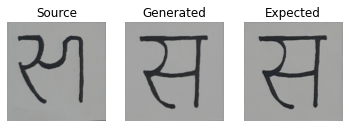

In [41]:
plot_images(src_image, gen_image, tar_image)

In [42]:
# src_image = cv2.imread(r"C:\Users\Vaibhavi\Desktop\sampl.jpg")
# src_image = cv2.resize(src_image, (256,256))
# src_image = (src_image-127.5)/127.5

In [43]:
# src_image.shape

(256, 256, 3)

In [208]:
# cv2.imshow("k", (src_image+1)/2)
# cv2.waitKey()

-1

In [44]:
# src_image = np.expand_dims(src_image, 0)

In [45]:
# src_image.shape

(1, 256, 256, 3)

In [46]:
# gen_image = model.predict(src_image)

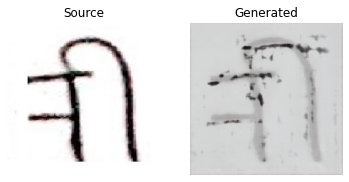

In [47]:
# plont(src_image, gen_image)

In [16]:
import matplotlib.pyplot as plt

In [17]:
def fixcolor(image):
    return (cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [18]:
image = cv2.imread(r"C:\Users\Vaibhavi\Desktop\Scan_0158.tif", 0)

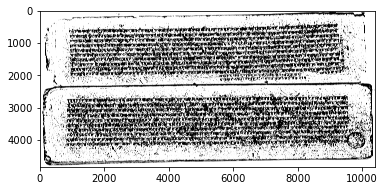

In [20]:
kernel = np.ones((3,3), np.uint8)
image = cv2.dilate(image, kernel, iterations=1)
plt.imshow(fixcolor(image))